In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

### Проверка на нормальность

Ранее мы неоднократно отмечали, что применимость того или иного метода сильно зависит от того, является ли распределение в нашей выборке нормальным. В качестве проверки распределения на нормальность приведём здесь __критерий Колмогорова-Смирнова__.

Для проведения этой проверки нам понадобится __эмпирическая функция распределения__. Она строится по выборке $X = (x_1, \dots, x_n)$ следующим образом:
$$F_n(x) = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n I_{x_i \leq x},$$
где $I_{x_i \leq x}$ — _индикатор_ события:
$$I_{x_i \leq x} = \begin{cases}
    1, & x_i \leq x, \\
    0, & x_i > x.
\end{cases}$$

Кроме того, нам понадобится обыкновенная функция распределения $F(x)$. Для её построения в качестве предполагаемых параметров нормального распределения будем использовать их оценки:
$$a = \overline{X}, \:\: \sigma = \sigma_X$$

Статистика для критерия Колмогорова-Смирнова определяется следующим образом:
$$D_n = \sup_x |F_n(x) - F(x)|$$

Далее для уровня значимости $\alpha$ вычисляется критическое значение распределения Колмогорова. Если полученная статистика $D_n$ превышает это значение, то гипотеза о нормальности распределения отвергается.

__Пример 5__

Проверим распределение роста хоккеистов на нормальность с помощью критерия Колмогорова-Смирнова.

Параметры этого распределения:

In [1]:
a = df['height'].mean()
sigma = df['height'].std(ddof=1)
n = df['height'].shape[0]
a, sigma, n

NameError: name 'df' is not defined

Визуализируем модуль разности между эмпирической и теоретической функциями распределения.

In [24]:
def edf(x: float) -> float:
    """Эмпирическая функция распределения веса хоккеистов.
    """
    
    samples = df['height']
    
    return samples[samples < x].shape[0] / samples.shape[0]

In [25]:
cdf = stats.norm(loc=a, scale=sigma).cdf

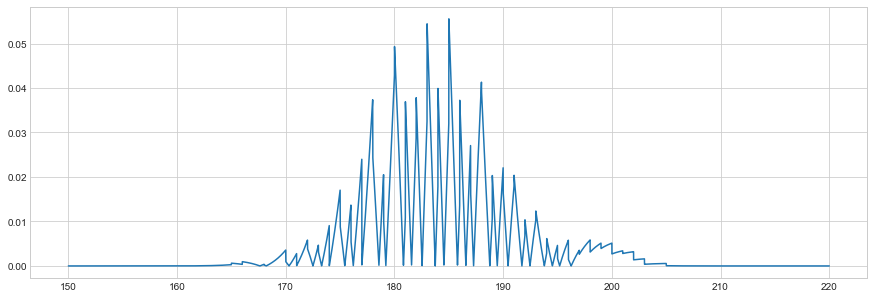

In [26]:
ox = np.linspace(150, 220, 10000)
oy = np.array([np.abs(edf(x) - cdf(x)) for x in ox])

plt.figure(figsize=(15, 5))
plt.plot(ox, oy)

Максимум разницы приходится на середину. Это же можно наблюдать по гистограмме, которая в районе середины сильнее всего расходится с тем, что можно было бы ожидать от нормального распределения:

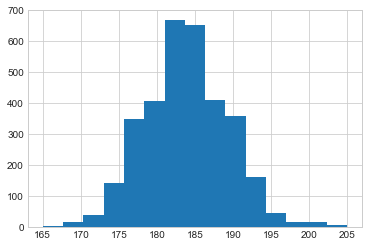

In [27]:
df['height'].hist(bins=15)

Максимум разницы:

In [28]:
x_max = 0
y_max = 0

for x, y in zip(ox, oy):
    if y > y_max:
        x_max = x
        y_max = y
        
x_max, y_max

(185.003500350035, 0.05554396529066541)

Итак, значение статистики Колмогорова:

In [29]:
D = y_max
D

0.05554396529066541

Критическое значение:

In [30]:
alpha = 0.05

stats.ksone.ppf(1 - alpha, n=n)

0.021273402287537584

Итак, для данного уровня значимости гипотеза о нормальности распределения роста хоккеистов отвергается.

Кстати, то же самое можно сделать сразу же с помощью функции `kstest`. В неё подаются параметры:

* `rvs` — массив с выборкой,
* `cdf` — функция распределения, с которой нужно сравнить значения из выборки.

Функция возвращает значение статистики Колмогорова, а также __P-значение__, т.е. максимальный уровень значимости $\alpha$, при котором гипотезу можно было бы принять. Аргумент `alternative` отвечает за то, какую альтернативную гипотезу мы хотим проверить. В нашем случае это правосторонняя область.

In [31]:
kstest = stats.kstest(rvs=df['height'], cdf=cdf, alternative='greater')
kstest

KstestResult(statistic=0.0557935621212321, pvalue=1.179726725135357e-09)

In [32]:
stats.ksone.ppf(1 - kstest.pvalue, n=n)

0.05579356208028649